# Shopping Trends Data Modeling

### Import Libraries

In [74]:
# Data Processing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, classification_report
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from scipy.stats import randint

# Tree Visualization
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

### Workflow

To fit and train this model, we’ll be following [The Machine Learning Workflow infographic](https://www.datacamp.com/blog/a-beginner-s-guide-to-the-machine-learning-workflow); however, as our data is pretty clean, we won’t be carrying out every step. We will do the following:

* Feature engineering
* Split the data
* Train the model
* Hyperparameter tuning
* Assess model performance


In [7]:
df = pd.read_csv("data/shopping_trends_final.csv")
df = df.iloc[:, 1:]
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [14]:
for col in df.columns:
    print(df[col].unique(), "\n")

[   1    2    3 ... 3898 3899 3900] 

[55 19 50 21 45 46 63 27 26 57 53 30 61 65 64 25 52 66 31 56 18 38 54 33
 36 35 29 70 69 67 20 39 42 68 49 59 47 40 41 48 22 24 44 37 58 32 62 51
 28 43 34 23 60] 

['Male' 'Female'] 

['Blouse' 'Sweater' 'Jeans' 'Sandals' 'Sneakers' 'Shirt' 'Shorts' 'Coat'
 'Handbag' 'Shoes' 'Dress' 'Skirt' 'Sunglasses' 'Pants' 'Jacket' 'Hoodie'
 'Jewelry' 'T-shirt' 'Scarf' 'Hat' 'Socks' 'Backpack' 'Belt' 'Boots'
 'Gloves'] 

['Clothing' 'Footwear' 'Outerwear' 'Accessories'] 

[ 53  64  73  90  49  20  85  34  97  31  68  72  51  81  36  38  48  62
  37  88  22  25  56  94  79  67  91  33  69  45  60  76  39 100  21  43
  54  55  30  28  59  24  83  46  70  29  26  58  96  40  32  95  41  47
  99  87  92  98  89  35  75  65  86  84  77  27  23  74  80  42  61  82
  78  93  50  57  66  44  52  71  63] 

['Kentucky' 'Maine' 'Massachusetts' 'Rhode Island' 'Oregon' 'Wyoming'
 'Montana' 'Louisiana' 'West Virginia' 'Missouri' 'Arkansas' 'Hawaii'
 'Delaware' 'New Hampshi

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [9]:
df.isna().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

In [10]:
df.duplicated().sum()

0

#### Split Dataset into Features and Target Variable

In this project I decided to build a model that predicts what Payment Method a customer  would purchase. Therefore my Y variable will be column: **Payment Method**

In [37]:
X = df.drop(['Payment Method'], axis=1)
y = df['Payment Method']

#### Split data into separate training and test set 

In [38]:
# split data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)


In [39]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((2613, 17), (1287, 17))

In [40]:
# check the shape of y_train and y_test

y_train.shape, y_test.shape

((2613,), (1287,))

### Feature Engineering

Feature Engineering is the process of transforming raw data into useful features that help us to understand our model better and increase its predictive power. I will carry out feature engineering on different types of variables.

First, I will check the data types of variables again.

In [41]:
#  check data types in X_train

X_train.dtypes

Customer ID                 int64
Age                         int64
Gender                     object
Item Purchased             object
Category                   object
Purchase Amount (USD)       int64
Location                   object
Size                       object
Color                      object
Season                     object
Review Rating             float64
Subscription Status        object
Shipping Type              object
Discount Applied           object
Promo Code Used            object
Previous Purchases          int64
Frequency of Purchases     object
dtype: object

#### Encode categorical variables

Now, I will encode the categorical variables.

In [42]:
object_vars = df.select_dtypes(['object'])

object_vars.head()

,Gender,Item Purchased,Category,Location,Size,Color,Season,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Payment Method,Frequency of Purchases
0,Male,Blouse,Clothing,Kentucky,L,Gray,Winter,Yes,Express,Yes,Yes,Venmo,Fortnightly
1,Male,Sweater,Clothing,Maine,L,Maroon,Winter,Yes,Express,Yes,Yes,Cash,Fortnightly
2,Male,Jeans,Clothing,Massachusetts,S,Maroon,Spring,Yes,Free Shipping,Yes,Yes,Credit Card,Weekly
3,Male,Sandals,Footwear,Rhode Island,M,Maroon,Spring,Yes,Next Day Air,Yes,Yes,PayPal,Weekly
4,Male,Blouse,Clothing,Oregon,M,Turquoise,Spring,Yes,Free Shipping,Yes,Yes,PayPal,Annually


In [43]:
int_vars = df.select_dtypes(['int64', 'float64'])

int_vars.head()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
0,1,55,53,3.1,14
1,2,19,64,3.1,2
2,3,50,73,3.1,23
3,4,21,90,3.5,49
4,5,45,49,2.7,31


In [44]:
# import category encoders

import category_encoders as ce

In [45]:
# encode categorical variables with ordinal encoding

encoder = ce.OrdinalEncoder(cols=['Gender', 'Item Purchased', 'Category', 'Location', 'Size', 'Color',
       'Season', 'Subscription Status', 'Shipping Type', 'Discount Applied',
       'Promo Code Used', 'Frequency of Purchases'])


X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [46]:
X_train.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Frequency of Purchases
78,79,50,1,1,1,91,1,1,1,1,4.7,1,1,1,1,50,1
944,945,54,1,2,2,97,2,2,2,1,4.8,1,2,1,1,39,2
199,200,54,1,3,2,73,3,3,3,2,3.8,1,2,1,1,32,3
1937,1938,43,1,4,1,53,4,1,4,2,4.5,2,3,2,2,11,4
1533,1534,50,1,5,3,59,5,1,5,2,3.6,2,3,1,1,16,5


In [ ]:
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Models


#### Random Forest Classifier model with default parameters

In [59]:
# instantiate the classifier 
rfc = RandomForestClassifier(n_estimators=100, max_depth=10,
                             random_state=0)

# fit the model
rfc.fit(X_train, y_train)

# Predict the Test set results
y_pred = rfc.predict(X_test)
y_pred[:10]

array(['Cash', 'PayPal', 'Debit Card', 'Credit Card', 'PayPal',
       'Debit Card', 'PayPal', 'Cash', 'Bank Transfer', 'Cash'],
      dtype=object)

In [60]:
# Check accuracy score 

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.1740


In [ ]:
# view the feature scores

feature_scores = pd.Series(rfc.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

Customer ID               0.102147
Purchase Amount (USD)     0.096837
Age                       0.095374
Location                  0.094983
Previous Purchases        0.092066
Review Rating             0.086286
Color                     0.085247
Item Purchased            0.079648
Frequency of Purchases    0.057421
Shipping Type             0.053042
Season                    0.042991
Size                      0.038348
Category                  0.036109
Gender                    0.011374
Subscription Status       0.009680
Promo Code Used           0.009470
Discount Applied          0.008977
dtype: float64

#### Visualize feature scores of the features

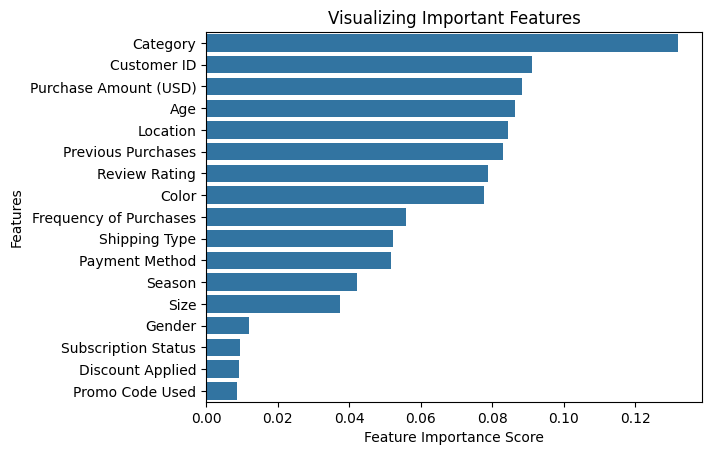

In [ ]:
# Creating a seaborn bar plot
sns.barplot(x=feature_scores, y=feature_scores.index)

# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')

# Add title to the graph
plt.title("Visualizing Important Features")


# Visualize the graph
plt.show()

In [79]:
X = df[['Item Purchased', 'Category', 'Location', 'Size', 'Color',
       'Season', 'Shipping Type', 'Frequency of Purchases']]
y = df['Payment Method']

In [80]:
# split data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [81]:
# encode categorical variables with ordinal encoding

encoder = ce.OrdinalEncoder(cols=['Item Purchased', 'Category', 'Location', 'Size', 'Color',
       'Season', 'Shipping Type', 'Frequency of Purchases'])


X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [82]:
# instantiate the classifier 
rfc = RandomForestClassifier(n_estimators=100, max_depth=10,
                             random_state=0)

# fit the model
rfc.fit(X_train, y_train)

# Predict the Test set results
y_pred = rfc.predict(X_test)
y_pred[:10]

array(['Cash', 'Bank Transfer', 'Cash', 'Credit Card', 'Debit Card',
       'Cash', 'Bank Transfer', 'Venmo', 'Venmo', 'Venmo'], dtype=object)

In [83]:
# Check accuracy score 

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.1786


#### Confusion matrix

A confusion matrix is a tool for summarizing the performance of a classification algorithm. A confusion matrix will give us a clear picture of classification model performance and the types of errors produced by the model. It gives us a summary of correct and incorrect predictions broken down by each category. The summary is represented in a tabular form.

Four types of outcomes are possible while evaluating a classification model performance. These four outcomes are described below:-

* ***True Positives (TP)*** – True Positives occur when we predict an observation belongs to a certain class and the observation actually belongs to that class.

* ***True Negatives (TN)*** – True Negatives occur when we predict an observation does not belong to a certain class and the observation actually does not belong to that class.

* ***False Positives (FP)*** – False Positives occur when we predict an observation belongs to a certain class but the observation actually does not belong to that class. This type of error is called Type I error.

* ***False Negatives (FN)*** – False Negatives occur when we predict an observation does not belong to a certain class but the observation actually belongs to that class. This is a very serious error and it is called Type II error.

These four outcomes are summarized in a confusion matrix given below.

In [84]:
# Print the Confusion Matrix and slice it into four pieces

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[26 35 16 31 31 32]
 [24 38 29 26 46 35]
 [30 47 43 26 36 37]
 [29 32 17 30 36 40]
 [24 39 34 26 50 35]
 [30 33 35 27 43 22]]


### Classification Report

Classification report is another way to evaluate the classification model performance. It displays the precision, recall, f1 and support scores for the model. I have described these terms in later.

We can print a classification report as follows:

In [85]:
print(classification_report(y_test, y_pred))

               precision    recall  f1-score   support

Bank Transfer       0.16      0.15      0.16       171
         Cash       0.17      0.19      0.18       198
  Credit Card       0.25      0.20      0.22       219
   Debit Card       0.18      0.16      0.17       184
       PayPal       0.21      0.24      0.22       208
        Venmo       0.11      0.12      0.11       190

     accuracy                           0.18      1170
    macro avg       0.18      0.18      0.18      1170
 weighted avg       0.18      0.18      0.18      1170



### Conclusion

The model performed quite poorly on the data. We will look into fine tuning the model and trying out different parameters or models in the future.

### References

> [Kaggle et](https://www.kaggle.com/code/prashant111/random-forest-classifier-tutorial)